In [1]:
import pandas as pd
import polars as pl

In [3]:
df_mov = pl.read_parquet('C:/Users/Gabriel.Gomes/Downloads/Turnover/Movimentações.parquet')

In [5]:
df_mov.head(5)

chave_coligada_chapa,dtmudanca,salario,integrada,descricao,PERCENTAPLICADO
str,str,str,str,str,str
"""1011000415""","""2021-07-01""","""1400.0""","""S""","""PROMOÇÃO""","""0.0"""
"""1011000472""","""2021-01-01""","""25000.0""","""S""","""PROMOÇÃO""","""0.0"""
"""1011000541""","""2021-03-01""","""3500.0""","""S""","""PROMOÇÃO""","""0.0"""
"""1011000777""","""2022-01-01""","""3473.62""","""S""","""PROMOÇÃO""","""0.0"""
"""1011000973""","""2021-04-01""","""2980.59""","""S""","""PROMOÇÃO""","""0.0"""


In [12]:
lazy_test = df_mov.lazy().select(
    ['chave_coligada_chapa', 'descricao']
)

In [13]:
lazy_test

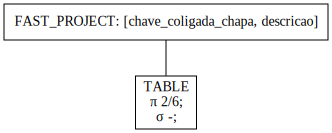

In [14]:
lazy_test.show_graph()

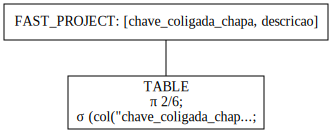

In [18]:
lazy_test2 = lazy_test.filter(
    pl.col('chave_coligada_chapa') =='1011000415'
)
lazy_test2.show_graph()

In [19]:
lazy_test3 = lazy_test2.filter(
    pl.col('descricao') == 'PROMOÇÃO'
)
lazy_test3

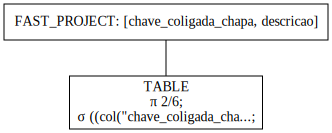

In [20]:
lazy_test3.show_graph()

In [27]:
%%time

for i in df_mov['chave_coligada_chapa']:
    base = df_mov.lazy().filter(
        pl.col('chave_coligada_chapa') == i
    )
    
    promo = base.filter(
        pl.col('descricao') == 'PROMOÇÃO'
    ).collect()
    
    merito = base.filter(
        pl.col('descricao') == 'MÉRITO'
    ).collect()
    
    

CPU times: total: 2.31 s
Wall time: 493 ms


In [29]:
df_mov_pd = df_mov.to_pandas()[['chave_coligada_chapa','descricao']]

In [42]:
%%time

for i in df_mov_pd['chave_coligada_chapa']:
    base = df_mov_pd.loc[df_mov_pd.chave_coligada_chapa == i].copy()
    
    promo = base.loc[base.descricao == 'PROMOÇÃO']
    
    merito = base.loc[base.descricao == 'MÉRITO']
    
    

CPU times: total: 1.16 s
Wall time: 1.14 s
